# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 623


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = 'metric'
    city_url = f'{url}appid={weather_api_key}&q={city}&units={units}'

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url)
        weather_json = city_weather.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = weather_json["coord"]["lat"]
        city_lng = weather_json["coord"]["lon"]
        city_max_temp = weather_json["main"]["temp_max"]
        city_humidity = weather_json["main"]["humidity"]
        city_clouds = weather_json["clouds"]["all"]
        city_wind = weather_json["wind"]["speed"]
        city_country = weather_json["sys"]["country"]
        city_date = weather_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | los llanos de aridane
Processing Record 2 of Set 1 | port alfred
Processing Record 3 of Set 1 | srednekolymsk
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | mount gambier
Processing Record 6 of Set 1 | klaksvik
Processing Record 7 of Set 1 | minab
Processing Record 8 of Set 1 | amderma
City not found. Skipping...
Processing Record 9 of Set 1 | atuona
Processing Record 10 of Set 1 | tuatapere
Processing Record 11 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 12 of Set 1 | geraldton
Processing Record 13 of Set 1 | koumac
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | kahului
Processing Record 16 of Set 1 | faya
Processing Record 17 of Set 1 | pereleshino
Processing Record 18 of Set 1 | hami
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | cape town
Processing Record 21 of Set 1 | lodja
Processing Reco

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          581
Lat           581
Lng           581
Max Temp      581
Humidity      581
Cloudiness    581
Wind Speed    581
Country       581
Date          581
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,los llanos de aridane,28.6585,-17.9182,20.86,85,75,4.63,ES,1667590459
1,port alfred,-33.5906,26.8910,18.43,92,70,3.89,ZA,1667590165
2,srednekolymsk,67.4500,153.6833,-28.09,94,83,0.31,RU,1667590460
3,hobart,-42.8794,147.3294,11.81,87,100,3.09,AU,1667590205
4,mount gambier,-37.8333,140.7667,6.46,96,46,2.33,AU,1667590307


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,los llanos de aridane,28.6585,-17.9182,20.86,85,75,4.63,ES,1667590459
1,port alfred,-33.5906,26.8910,18.43,92,70,3.89,ZA,1667590165
2,srednekolymsk,67.4500,153.6833,-28.09,94,83,0.31,RU,1667590460
3,hobart,-42.8794,147.3294,11.81,87,100,3.09,AU,1667590205
4,mount gambier,-37.8333,140.7667,6.46,96,46,2.33,AU,1667590307


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

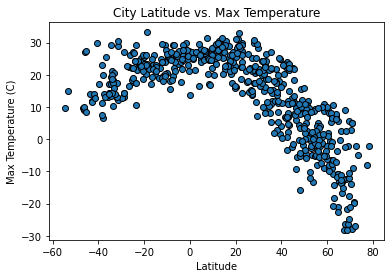

In [8]:
# Build scatter plot for latitude vs. temperature
lat_x = pd.Series(city_data_df['Lat'])
temp_y = pd.Series(city_data_df['Max Temp'])
plt.scatter(lat_x, temp_y, marker = 'o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

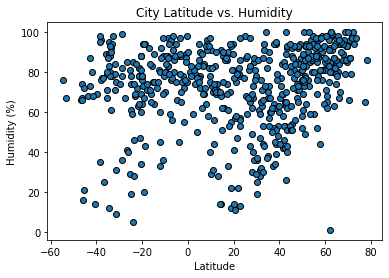

In [9]:
# Build the scatter plots for latitude vs. humidity
#lat_x = pd.Series(city_data_df['Lat']) -- added as a reminder. same x is used as above
humid_y = pd.Series(city_data_df['Humidity'])
plt.scatter(lat_x, humid_y, marker = 'o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

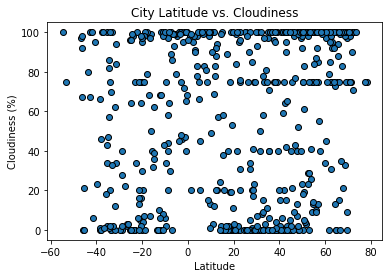

In [10]:
# Build the scatter plots for latitude vs. cloudiness
#lat_x = pd.Series(city_data_df['Lat']) -- added as a reminder. same x is used as above
cld_y = pd.Series(city_data_df['Cloudiness'])
plt.scatter(lat_x, cld_y, marker = 'o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

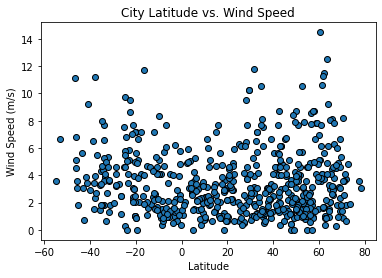

In [11]:
# Build the scatter plots for latitude vs. wind speed
#lat_x = pd.Series(city_data_df['Lat']) -- added as a reminder. same x is used as above
wind_y = pd.Series(city_data_df['Wind Speed'])
plt.scatter(lat_x, wind_y, marker = 'o', edgecolors='black')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def lin_regres(x_values, y_values, x_label, y_label, title, line_eqx, line_eqy):
    #line regress equation
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    #plot the scatter
    plt.scatter(x_values, y_values, marker = 'o', edgecolors='black')
    plt.plot(x_values, regress_values, 'r-')
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept, 2))
    plt.annotate(line_eq, (line_eqx, line_eqy), fontsize = 15, color = 'red')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

    #Rvalue
    r_sq = r_value **2
    print(f'r-squared is {r_sq}')




In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,los llanos de aridane,28.6585,-17.9182,20.86,85,75,4.63,ES,1667590459
2,srednekolymsk,67.4500,153.6833,-28.09,94,83,0.31,RU,1667590460
5,klaksvik,62.2266,-6.5890,6.51,92,100,11.50,FO,1667590461
6,minab,27.1467,57.0801,25.18,65,31,0.51,IR,1667590461
11,cabo san lucas,22.8909,-109.9124,29.78,57,20,4.12,MX,1667590464


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,port alfred,-33.5906,26.8910,18.43,92,70,3.89,ZA,1667590165
3,hobart,-42.8794,147.3294,11.81,87,100,3.09,AU,1667590205
4,mount gambier,-37.8333,140.7667,6.46,96,46,2.33,AU,1667590307
7,atuona,-9.8000,-139.0333,25.35,80,2,8.35,PF,1667590462
8,tuatapere,-46.1333,167.6833,9.14,74,92,5.16,NZ,1667590462


r-squared is 0.43714543881821866


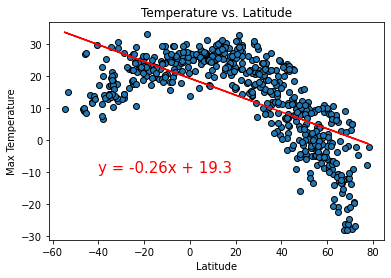

In [15]:
###  Temperature vs. Latitude Linear Regression Plot
lin_regres(lat_x, temp_y, 'Latitude', 'Max Temperature', 'Temperature vs. Latitude', -40, -10)


r-squared is 0.7151336889685277


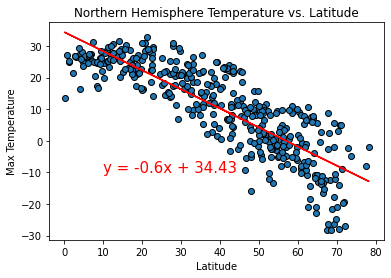

In [16]:
# Linear regression on Northern Hemisphere
Nlat_x = northern_hemi_df['Lat']
Ntemp_y = northern_hemi_df['Max Temp']

lin_regres(Nlat_x, Ntemp_y, 'Latitude', 'Max Temperature', 'Northern Hemisphere Temperature vs. Latitude', 10, -10)


r-squared is 0.381801025418854


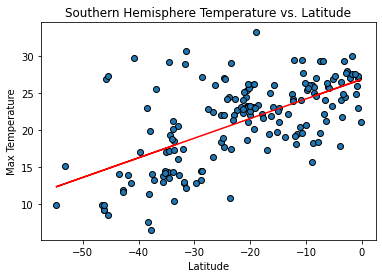

In [17]:
# Linear regression on Southern Hemisphere
Slat_x = southern_hemi_df['Lat']
Stemp_y = southern_hemi_df['Max Temp']

lin_regres(Slat_x, Stemp_y, 'Latitude', 'Max Temperature', 'Southern Hemisphere Temperature vs. Latitude', -30, 5)


**Discussion about the linear relationship:**
The r-value squared is always between 0 and 1. A high r-squared shows a strong correlation and a low r-squared shows a very week to no correlation. In the first plot, we show a r-squared value of 0.405. This is a weak correlation between latitude and max temperature. When we split the data into the Northern and Southern hemispheres, we can see a strong negative correlation (0.728) between latitude and max temperature in the northern hemisphere and a weak (0.411) positive correlation between latitude and max temperature in the southern hemisphere. 

### Humidity vs. Latitude Linear Regression Plot

r-squared is 0.09944454684489056


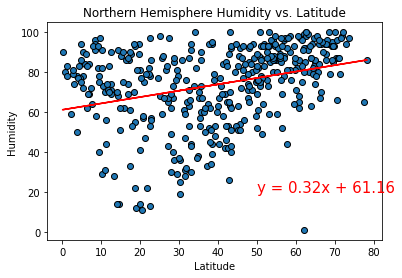

In [18]:
# Northern Hemisphere
Nlat_x = northern_hemi_df['Lat']
Nhum_y = northern_hemi_df['Humidity']

lin_regres(Nlat_x, Nhum_y, 'Latitude', 'Humidity', 'Northern Hemisphere Humidity vs. Latitude', 50, 20)


r-squared is 0.041960825311453495


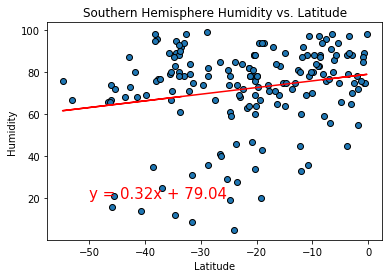

In [19]:
# Southern Hemisphere
Slat_x = southern_hemi_df['Lat']
Shum_y = southern_hemi_df['Humidity']

lin_regres(Slat_x, Shum_y, 'Latitude', 'Humidity', 'Southern Hemisphere Humidity vs. Latitude', -50, 20)


**Discussion about the linear relationship:** As shown in the scatter plots above, there is no correlation, or a very week correlation between latitude and humidity in both the northern and southern hemispheres. In this example, both the northern hemisphere and the southern hemisphere show a slight positive correlation.

### Cloudiness vs. Latitude Linear Regression Plot

r-squared is 0.03161783910190097


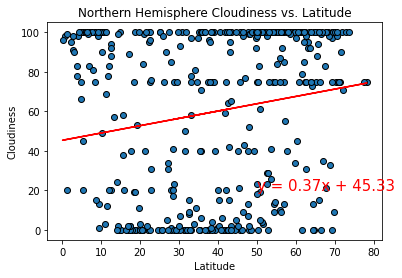

In [20]:
# Northern Hemisphere
Nlat_x = northern_hemi_df['Lat']
Ncld_y = northern_hemi_df['Cloudiness']

lin_regres(Nlat_x, Ncld_y, 'Latitude', 'Cloudiness', 'Northern Hemisphere Cloudiness vs. Latitude', 50, 20)


r-squared is 0.034273858494451304


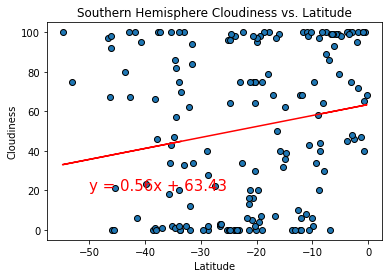

In [21]:
# Southern Hemisphere
Slat_x = southern_hemi_df['Lat']
Scld_y = southern_hemi_df['Cloudiness']

lin_regres(Slat_x, Scld_y, 'Latitude', 'Cloudiness', 'Southern Hemisphere Cloudiness vs. Latitude', -50, 20)


**Discussion about the linear relationship:** As shown in the scatter plots above, there is no correlation, or a very week correlation between latitude and cloudiness in both the northern and southern hemispheres. In this example, both the northern hemisphere and the southern hemisphere show a slight positive correlation.

### Wind Speed vs. Latitude Linear Regression Plot

r-squared is 0.023032451837213447


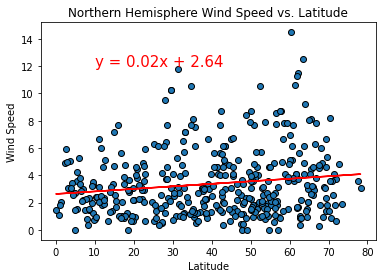

In [22]:
# Northern Hemisphere
Nlat_x = northern_hemi_df['Lat']
Nwind_y = northern_hemi_df['Wind Speed']

lin_regres(Nlat_x, Nwind_y, 'Latitude', 'Wind Speed', 'Northern Hemisphere Wind Speed vs. Latitude', 10, 12)


r-squared is 0.0647881474820965


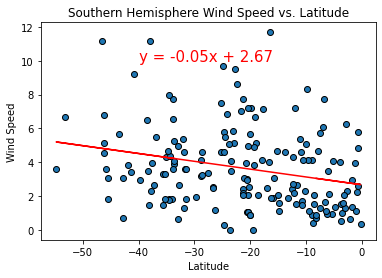

In [23]:
# Southern Hemisphere
Slat_x = southern_hemi_df['Lat']
Swind_y = southern_hemi_df['Wind Speed']

lin_regres(Slat_x, Swind_y, 'Latitude', 'Wind Speed', 'Southern Hemisphere Wind Speed vs. Latitude', -40, 10)


**Discussion about the linear relationship:** As shown in the scatter plots above, there is no correlation, or a very week correlation between latitude and cloudiness in both the northern and southern hemispheres. In this example, the northern hemisphere shows a slight positive correlation and the southern hemisphere shows a slight negative correlation. 